# 1.데이터 불러오기

In [90]:
# ===== 0) Import =====
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rc("font", family="Malgun Gothic")  # 한글 폰트 (윈도우: 맑은 고딕)

# ===== 0) 데이터 경로 =====
path = "C:/Users/eunseok/Desktop/빅콘테스트/1456289"   # 공통 경로 (작업 환경에 맞게 수정)

# ===== 1) 데이터 로드 =====
set1 = pd.read_csv(os.path.join(path, "big_data_set1_f.csv"), encoding="cp949")
set2 = pd.read_csv(os.path.join(path, "big_data_set2_f.csv"), encoding="cp949")
set3 = pd.read_csv(os.path.join(path, "big_data_set3_f.csv"), encoding="cp949")


In [91]:
set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ENCODED_MCT             86590 non-null  object 
 1   TA_YM                   86590 non-null  int64  
 2   MCT_OPE_MS_CN           86590 non-null  object 
 3   RC_M1_SAA               86590 non-null  object 
 4   RC_M1_TO_UE_CT          86590 non-null  object 
 5   RC_M1_UE_CUS_CN         86590 non-null  object 
 6   RC_M1_AV_NP_AT          86590 non-null  object 
 7   APV_CE_RAT              79958 non-null  object 
 8   DLV_SAA_RAT             86590 non-null  float64
 9   M1_SME_RY_SAA_RAT       86590 non-null  float64
 10  M1_SME_RY_CNT_RAT       86590 non-null  float64
 11  M12_SME_RY_SAA_PCE_RT   86590 non-null  float64
 12  M12_SME_BZN_SAA_PCE_RT  86590 non-null  float64
 13  M12_SME_RY_ME_MCT_RAT   86590 non-null  float64
 14  M12_SME_BZN_ME_MCT_RAT  86590 non-null

In [92]:
# =====  MERGE =====
# set2 × set3 : (가맹점구분번호, 기준년월) 기준
merged = pd.merge(
    set2,
    set3,
    on=["ENCODED_MCT", "TA_YM"],
    how="inner"  # 필요시 left/right/outer로 변경
)

# set1의 상권/업종 붙이기
df = pd.merge(merged, set1, on="ENCODED_MCT", how="left")

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENCODED_MCT               86590 non-null  object 
 1   TA_YM                     86590 non-null  int64  
 2   MCT_OPE_MS_CN             86590 non-null  object 
 3   RC_M1_SAA                 86590 non-null  object 
 4   RC_M1_TO_UE_CT            86590 non-null  object 
 5   RC_M1_UE_CUS_CN           86590 non-null  object 
 6   RC_M1_AV_NP_AT            86590 non-null  object 
 7   APV_CE_RAT                79958 non-null  object 
 8   DLV_SAA_RAT               86590 non-null  float64
 9   M1_SME_RY_SAA_RAT         86590 non-null  float64
 10  M1_SME_RY_CNT_RAT         86590 non-null  float64
 11  M12_SME_RY_SAA_PCE_RT     86590 non-null  float64
 12  M12_SME_BZN_SAA_PCE_RT    86590 non-null  float64
 13  M12_SME_RY_ME_MCT_RAT     86590 non-null  float64
 14  M12_SM

# 2. 컬럼명 한글로 변경

In [94]:
# ==============================

# ==============================
rename_cols = {
    # 공통 키/날짜
    "ENCODED_MCT": "가맹점구분번호",
    "TA_YM": "기준년월",
    # 순서형(구간) 원본
    "MCT_OPE_MS_CN": "가맹점_운영개월수_구간",
    "RC_M1_SAA": "매출금액_구간",
    "RC_M1_TO_UE_CT": "매출건수_구간",
    "RC_M1_UE_CUS_CN": "유니크고객수_구간",
    "RC_M1_AV_NP_AT": "객단가_구간",
    "APV_CE_RAT": "취소율_구간",
    # 연속형/비율
    "DLV_SAA_RAT": "배달매출금액_비율",
    "M1_SME_RY_SAA_RAT": "동일업종_매출금액_비율",
    "M1_SME_RY_CNT_RAT": "동일업종_매출건수_비율",
    "M12_SME_RY_SAA_PCE_RT": "동일업종_내_매출순위_비율",
    "M12_SME_BZN_SAA_PCE_RT": "동일상권_내_매출순위_비율",
    "M12_SME_RY_ME_MCT_RAT": "동일업종_내_해지_가맹점_비중",
    "M12_SME_BZN_ME_MCT_RAT": "동일상권_내_해지_가맹점_비중",
    # 성/연령/유형비중
    "M12_MAL_1020_RAT": "남성_20대이하_고객비중",
    "M12_MAL_30_RAT": "남성_30대_고객비중",
    "M12_MAL_40_RAT": "남성_40대_고객비중",
    "M12_MAL_50_RAT": "남성_50대_고객비중",
    "M12_MAL_60_RAT": "남성_60대이상_고객비중",
    "M12_FME_1020_RAT": "여성_20대이하_고객비중",
    "M12_FME_30_RAT": "여성_30대_고객비중",
    "M12_FME_40_RAT": "여성_40대_고객비중",
    "M12_FME_50_RAT": "여성_50대_고객비중",
    "M12_FME_60_RAT": "여성_60대이상_고객비중",
    "MCT_UE_CLN_REU_RAT": "재방문_고객비중",
    "MCT_UE_CLN_NEW_RAT": "신규_고객비중",
    "RC_M1_SHC_RSD_UE_CLN_RAT": "거주_이용_고객비율",
    "RC_M1_SHC_WP_UE_CLN_RAT": "직장_이용_고객비율",
    "RC_M1_SHC_FLP_UE_CLN_RAT": "유동인구_이용_고객비율",
    # 부가정보(있는 경우만)
    "MCT_BSE_AR": "가맹점주소",
    "MCT_NM": "가맹점명",
    "MCT_BRD_NUM": "브랜드구분코드",
    "MCT_SIGUNGU_NM": "가맹점지역",
    "HPSN_MCT_ZCD_NM": "업종",
    "HPSN_MCT_BZN_CD_NM": "상권",
    "ARE_D": "개설일",
    "MCT_ME_D": "폐업일",
}
df = df.rename(columns=rename_cols)

# 3. 전처리

In [95]:

import re
import numpy as np
import pandas as pd

#  기준년월 → datetime (int64에서 변환)
if pd.api.types.is_integer_dtype(df["기준년월"]) or pd.api.types.is_object_dtype(df["기준년월"]):
    df["기준년월"] = pd.to_datetime(df["기준년월"].astype(str), format="%Y%m", errors="coerce")

#  개설일/폐업일(있으면) 날짜 파싱
def parse_yyyymmdd(series: pd.Series) -> pd.Series:
    s = series.astype(str).str.strip()
    s = s.replace({"": np.nan, "nan": np.nan, "NaN": np.nan})
    s = s.str.replace(r"[^\d]", "", regex=True).str.slice(0, 8)
    return pd.to_datetime(s, format="%Y%m%d", errors="coerce")

for dcol in ["개설일", "폐업일"]:
    if dcol in df.columns:
        df[dcol] = parse_yyyymmdd(df[dcol])

#  특수 결측치 처리 (-999999.9 → NaN)  ※ 존재 시만
for c in ["배달매출금액_비율", "동일상권_내_해지_가맹점_비중"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").replace(-999999.9, np.nan)

#  동일업종 비율 숫자화 + 동시 0 → NaN
for c in ["동일업종_매출금액_비율", "동일업종_매출건수_비율"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
mask_both_zero = (df["동일업종_매출금액_비율"] == 0) & (df["동일업종_매출건수_비율"] == 0)
df.loc[mask_both_zero, ["동일업종_매출금액_비율", "동일업종_매출건수_비율"]] = np.nan

#  *_구간 → *_구간_ord (1~6 등급 숫자 추출)
def extract_level(x):
    if pd.isna(x): return np.nan
    m = re.match(r"\s*([1-6])", str(x))
    return float(m.group(1)) if m else np.nan

ord_src = ["가맹점_운영개월수_구간","매출금액_구간","매출건수_구간","유니크고객수_구간","객단가_구간","취소율_구간"]
for col in ord_src:
    if col in df.columns:
        df[col + "_ord"] = df[col].apply(extract_level)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   가맹점구분번호           86590 non-null  object        
 1   기준년월              86590 non-null  datetime64[ns]
 2   가맹점_운영개월수_구간      86590 non-null  object        
 3   매출금액_구간           86590 non-null  object        
 4   매출건수_구간           86590 non-null  object        
 5   유니크고객수_구간         86590 non-null  object        
 6   객단가_구간            86590 non-null  object        
 7   취소율_구간            79958 non-null  object        
 8   배달매출금액_비율         29245 non-null  float64       
 9   동일업종_매출금액_비율      79879 non-null  float64       
 10  동일업종_매출건수_비율      79879 non-null  float64       
 11  동일업종_내_매출순위_비율    86590 non-null  float64       
 12  동일상권_내_매출순위_비율    86590 non-null  float64       
 13  동일업종_내_해지_가맹점_비중  86590 non-null  float64       
 14  동일상권_내_해지_가맹점_비중  6517

In [97]:
# '폐업일' 값 유무에 따라 is_closed 생성 (1=폐업, 0=미폐업)
df["is_closed"] = df["폐업일"].notna().astype(int)

print(df[["폐업일", "is_closed"]].head())


  폐업일  is_closed
0 NaT          0
1 NaT          0
2 NaT          0
3 NaT          0
4 NaT          0


In [98]:
print(df.head())

      가맹점구분번호       기준년월 가맹점_운영개월수_구간             매출금액_구간             매출건수_구간  \
0  000F03E44A 2024-04-01     4_50-75%            5_75-90%            5_75-90%   
1  000F03E44A 2023-12-01     4_50-75%  6_90%초과(하위 10% 이하)  6_90%초과(하위 10% 이하)   
2  002816BA73 2024-04-01     2_10-25%            3_25-50%            4_50-75%   
3  002816BA73 2024-11-01     2_10-25%            3_25-50%            4_50-75%   
4  002816BA73 2024-06-01     2_10-25%            4_50-75%            4_50-75%   

            유니크고객수_구간              객단가_구간          취소율_구간  배달매출금액_비율  \
0            5_75-90%            5_75-90%         1_상위1구간        NaN   
1  6_90%초과(하위 10% 이하)  6_90%초과(하위 10% 이하)             NaN        NaN   
2            4_50-75%            2_10-25%  6_상위6구간(하위1구간)        NaN   
3            4_50-75%            2_10-25%  6_상위6구간(하위1구간)        NaN   
4            4_50-75%            2_10-25%         1_상위1구간        NaN   

   동일업종_매출금액_비율  ...   상권        개설일  폐업일  가맹점_운영개월수_구간_ord  매출금액_구간_ord  \
0   

In [99]:
df['재방문_고객비중'].head()

0     5.00
1     0.00
2    10.66
3    10.41
4     9.86
Name: 재방문_고객비중, dtype: float64

# 4. plot

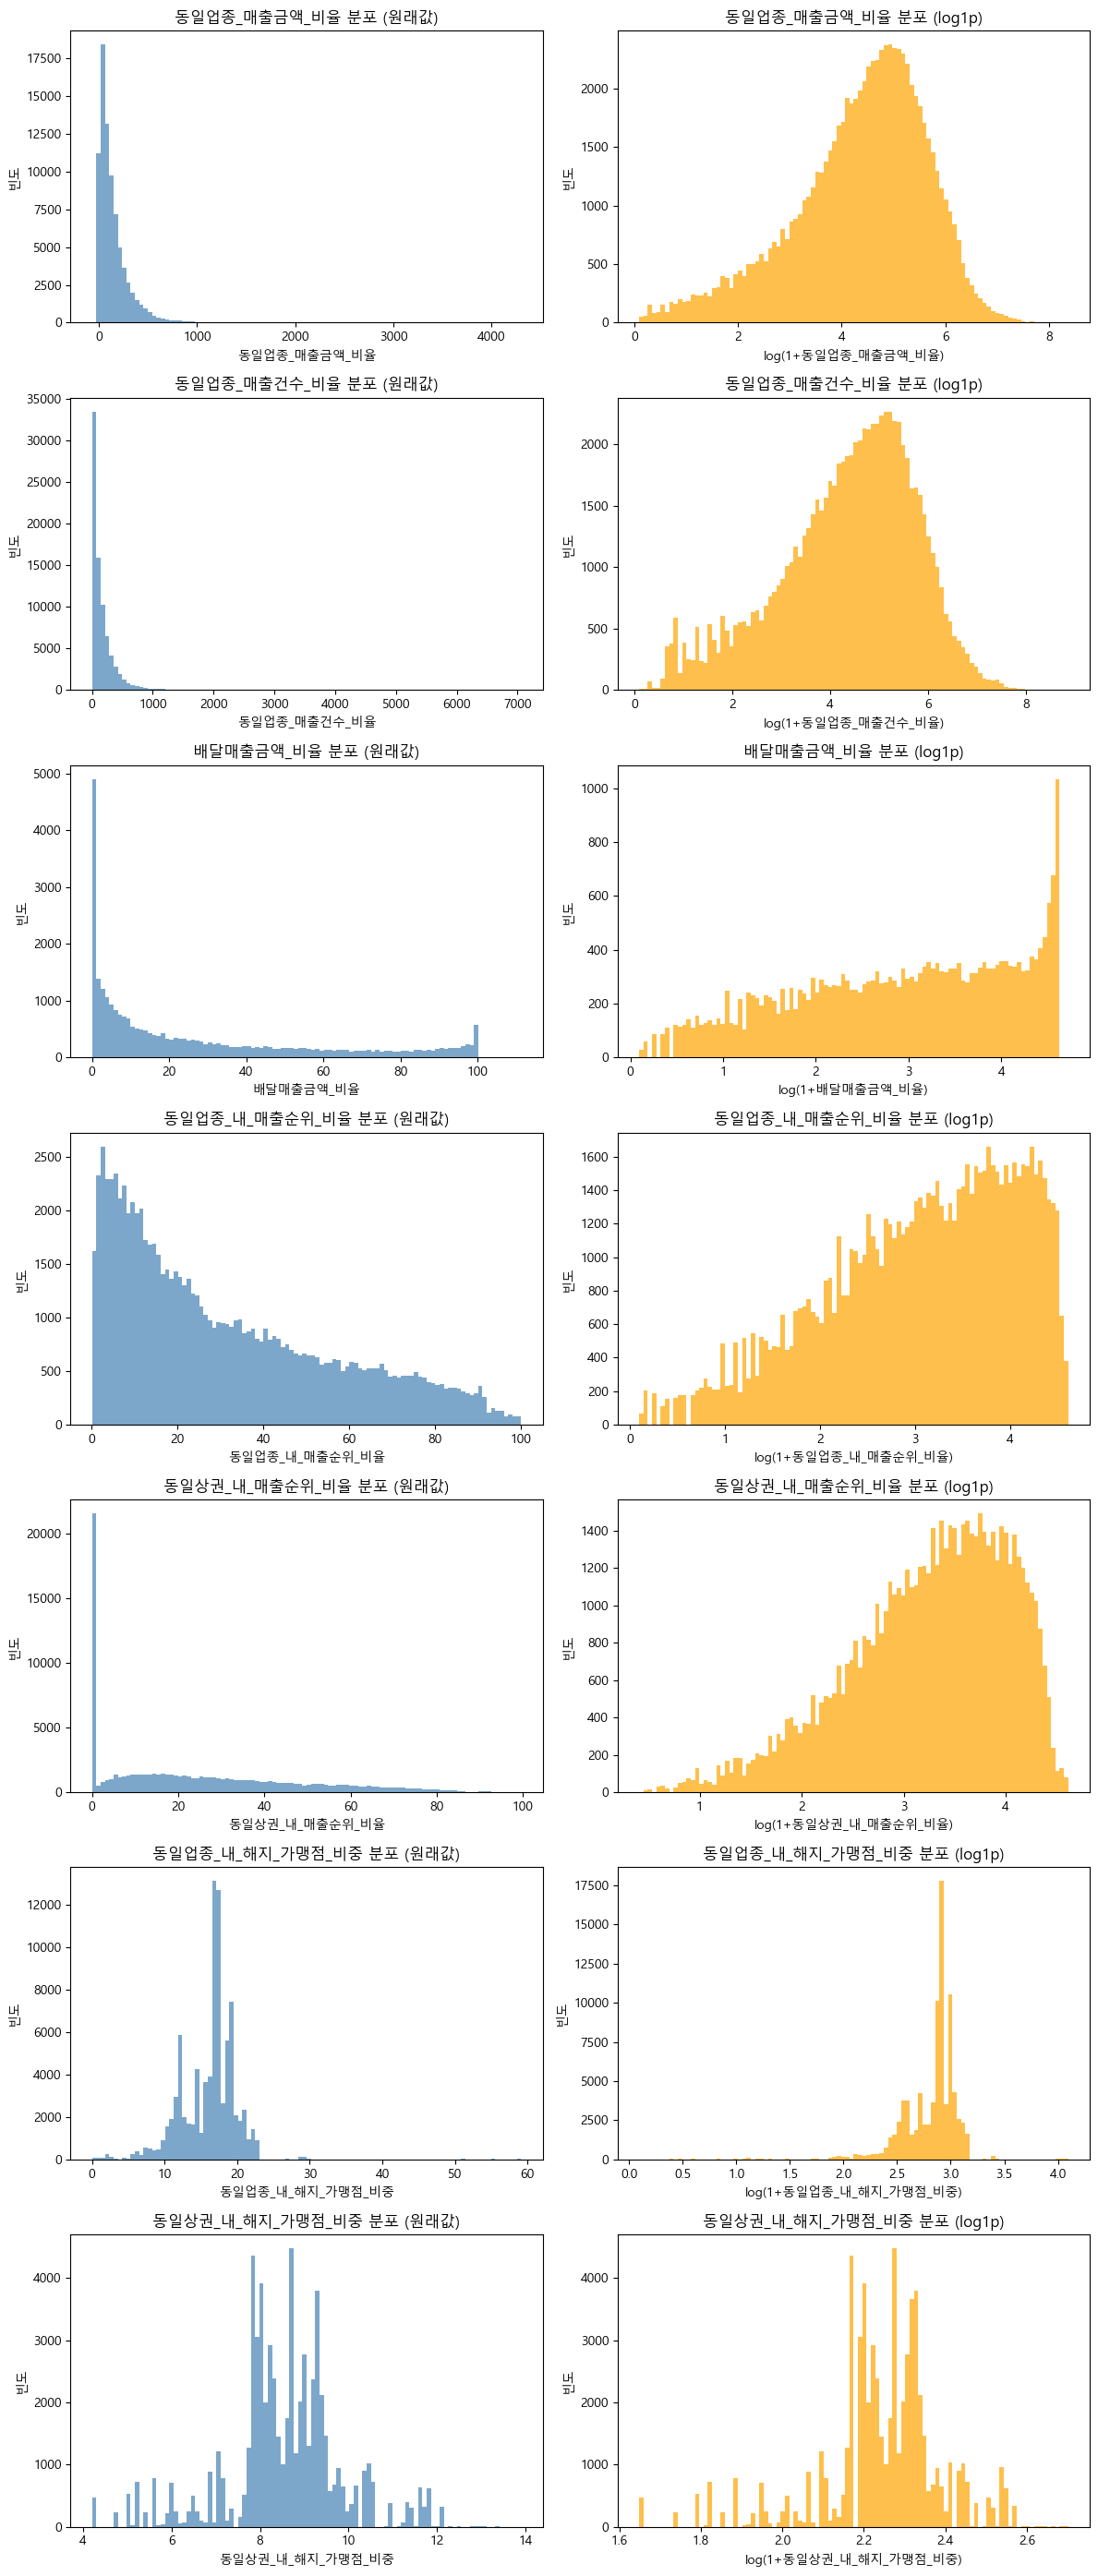

In [100]:
# ===== 한글 폰트 설정 (Windows/macOS/Linux 자동) =====
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

system = platform.system()

# 플롯할 주요 비율 변수들
plot_cols = [
    "동일업종_매출금액_비율",
    "동일업종_매출건수_비율",
    "배달매출금액_비율",
    "동일업종_내_매출순위_비율",
    "동일상권_내_매출순위_비율",
    "동일업종_내_해지_가맹점_비중",
    "동일상권_내_해지_가맹점_비중",
    
    
]

fig, axes = plt.subplots(len(plot_cols), 2, figsize=(12, 4*len(plot_cols)))

for i, col in enumerate(plot_cols):
    if col not in df.columns:
        continue
    data = df[col].dropna()
    log_data = np.log1p(data[data > 0])  # log(1+x), 0은 제외

    # 원래값 분포
    axes[i, 0].hist(data, bins=100, color="steelblue", alpha=0.7)
    axes[i, 0].set_title(f"{col} 분포 (원래값)")
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel("빈도")

    # 로그 분포
    axes[i, 1].hist(log_data, bins=100, color="orange", alpha=0.7)
    axes[i, 1].set_title(f"{col} 분포 (log1p)")
    axes[i, 1].set_xlabel(f"log(1+{col})")
    axes[i, 1].set_ylabel("빈도")

plt.tight_layout()
plt.show()


## 4-1. 배달 plot

c:\Users\eunseok\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


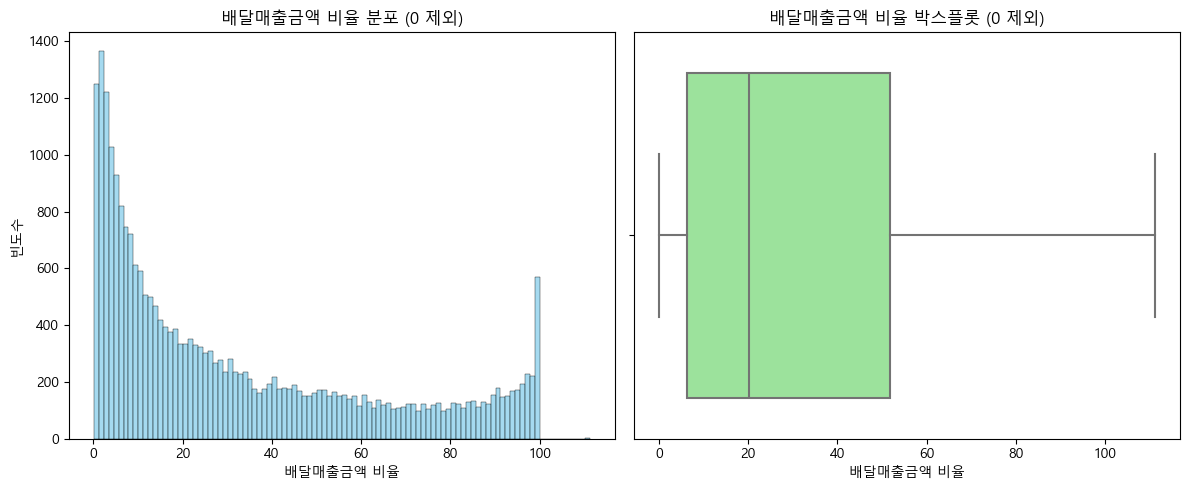

In [101]:

import matplotlib.pyplot as plt
import seaborn as sns

# 0이 아닌 값만 필터링
delivery_nonzero = df[df['배달매출금액_비율'] > 0]['배달매출금액_비율']

plt.figure(figsize=(12,5))

# 히스토그램
plt.subplot(1,2,1)
sns.histplot(delivery_nonzero, bins=100, kde=False, color="skyblue")
plt.title("배달매출금액 비율 분포 (0 제외)")
plt.xlabel("배달매출금액 비율")
plt.ylabel("빈도수")

# 박스플롯
plt.subplot(1,2,2)
sns.boxplot(x=delivery_nonzero, color="lightgreen")
plt.title("배달매출금액 비율 박스플롯 (0 제외)")
plt.xlabel("배달매출금액 비율")

plt.tight_layout()
plt.show()


## 4-2. 년도별 개업가게 수

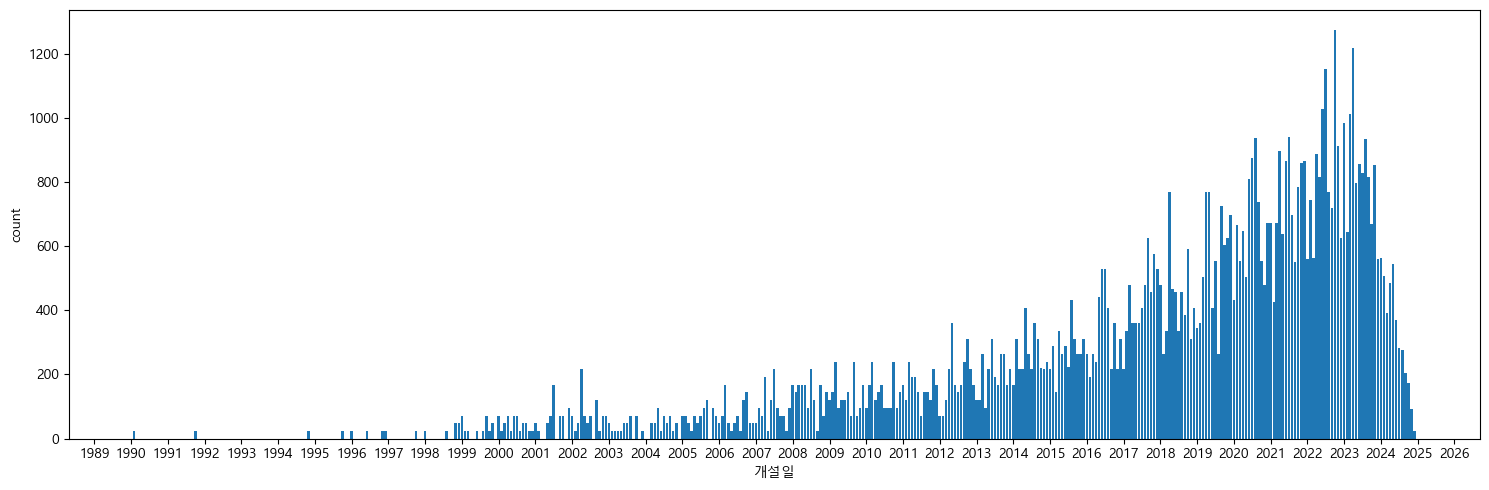

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1) 개설일이 datetime인지 보장
s = pd.to_datetime(df["개설일"], errors="coerce").dropna()

# 2) 월별 집계 (새 컬럼 안 만듦)
monthly_cnt = s.dt.to_period("M").dt.to_timestamp().value_counts().sort_index()

# 3) 그리기
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(monthly_cnt.index, monthly_cnt.values, width=25)  # 막대 폭은 보기 좋게 조정

# 4) x축: 연도만 표시
ax.xaxis.set_major_locator(mdates.YearLocator())               # 연도 단위 눈금
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))       # 'YYYY'만 보이게
ax.tick_params(axis='x', rotation=0)

ax.set_xlabel('개설일')
ax.set_ylabel('count')
plt.tight_layout()
plt.show()


## 4-3 폐업데이터와 비교

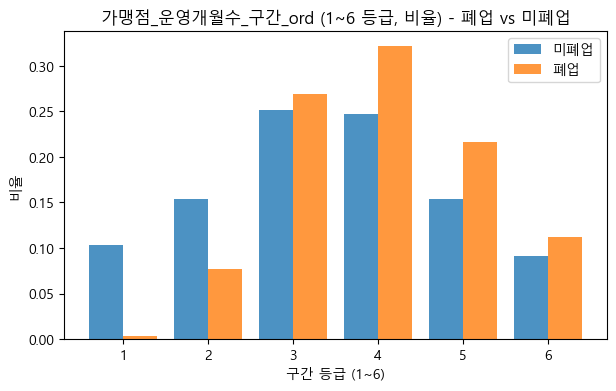

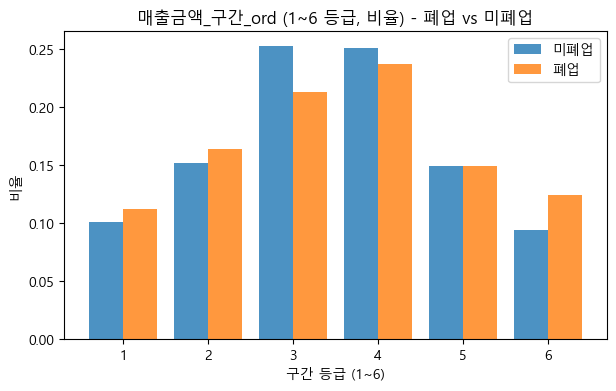

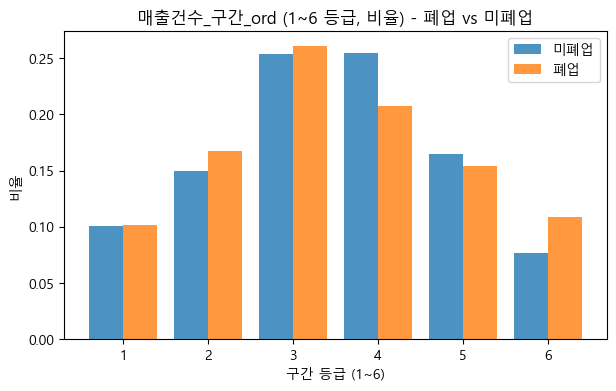

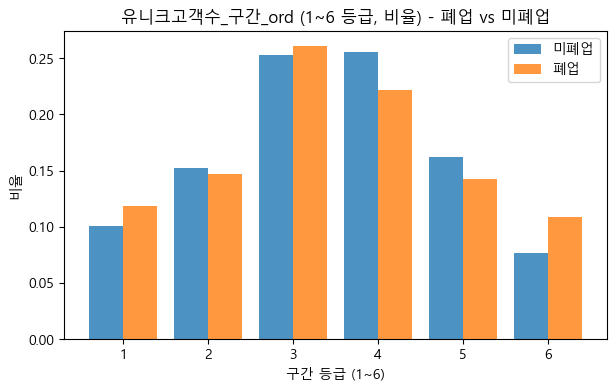

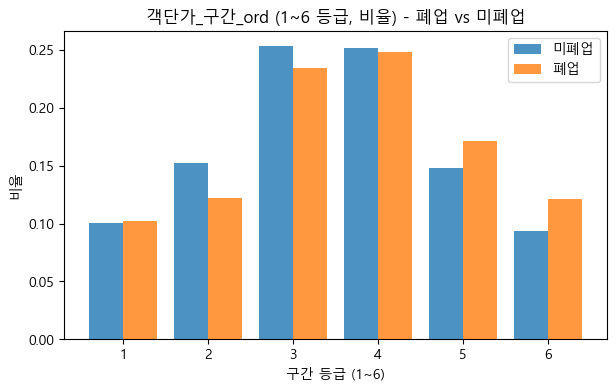

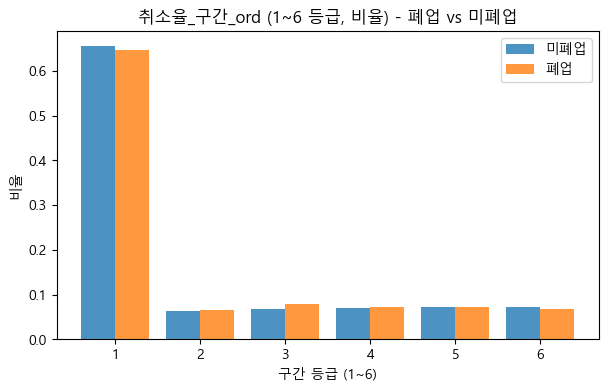

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 연속형(비율) 변수: 폐업 vs 미폐업 히스토그램 (원값 & log1p, density=True) ---
for col in cont_cols:
    if col not in df.columns:
        continue
    sub = df[[col, "is_closed"]].dropna()
    if sub.empty:
        continue

    # (a) 원값
    plt.figure(figsize=(7,4))
    sub.loc[~sub["is_closed"], col].plot(
        kind="hist", bins=80, alpha=0.5, label="미폐업", density=True
    )
    sub.loc[sub["is_closed"], col].plot(
        kind="hist", bins=80, alpha=0.5, label="폐업", density=True
    )
    plt.title(f"{col} 분포 (원값, 밀도) - 폐업 vs 미폐업")
    plt.xlabel(col); plt.ylabel("밀도"); plt.legend()
    plt.show()

    # (b) log1p (0 초과만)
    log_open = np.log1p(sub.loc[(~sub["is_closed"]) & (sub[col] > 0), col])
    log_closed = np.log1p(sub.loc[(sub["is_closed"]) & (sub[col] > 0), col])
    if (len(log_open) > 0) and (len(log_closed) > 0):
        plt.figure(figsize=(7,4))
        pd.Series(log_open).plot(
            kind="hist", bins=80, alpha=0.5, label="미폐업", density=True
        )
        pd.Series(log_closed).plot(
            kind="hist", bins=80, alpha=0.5, label="폐업", density=True
        )
        plt.title(f"{col} 분포 (log1p, 밀도) - 폐업 vs 미폐업")
        plt.xlabel(f"log(1+{col})"); plt.ylabel("밀도"); plt.legend()
        plt.show()

# --- 순서형(1~6) 변수: 막대그래프는 비율(밀도)로 ---
for col in ord_cols:
    sub = df[[col, "is_closed"]].dropna()
    if sub.empty:
        continue

    levels = [1,2,3,4,5,6]

    # is_closed (0/1) → 불리언으로 변환해서 필터링
    open_counts = sub.loc[sub["is_closed"] == 0, col].value_counts(normalize=True).reindex(levels, fill_value=0)
    closed_counts = sub.loc[sub["is_closed"] == 1, col].value_counts(normalize=True).reindex(levels, fill_value=0)

    x = np.arange(len(levels)); width = 0.4
    plt.figure(figsize=(7,4))
    plt.bar(x - width/2, open_counts.values, width=width, alpha=0.8, label="미폐업")
    plt.bar(x + width/2, closed_counts.values, width=width, alpha=0.8, label="폐업")
    plt.title(f"{col} (1~6 등급, 비율) - 폐업 vs 미폐업")
    plt.xlabel("구간 등급 (1~6)")
    plt.ylabel("비율")
    plt.xticks(x, [str(l) for l in levels])
    plt.legend()
    plt.show()



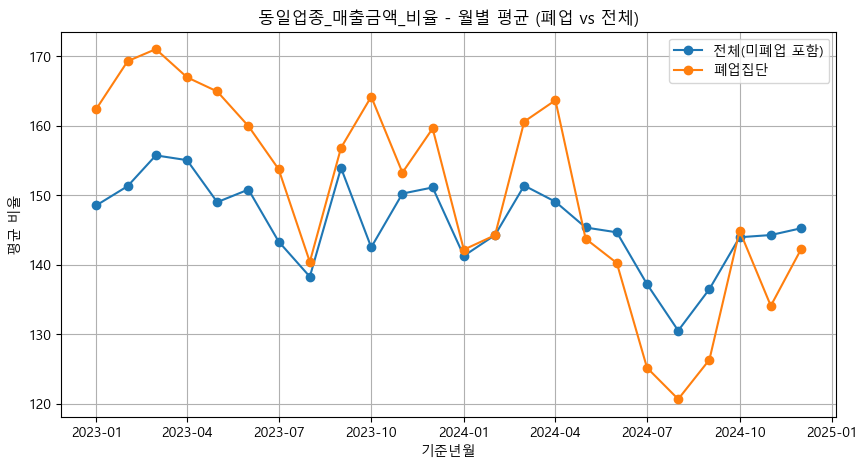

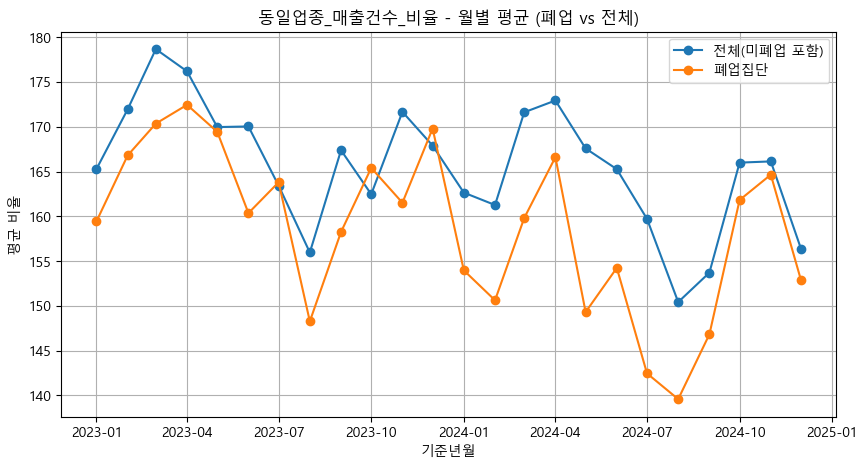

In [104]:
import matplotlib.pyplot as plt

# 비교할 컬럼
cols = ["동일업종_매출금액_비율", "동일업종_매출건수_비율"]

# 집단 플래그 확인
if "is_closed" not in df.columns:
    df["is_closed"] = df["폐업일"].notna()

# 월별 평균 계산 (전체 vs 폐업)
time_group = (
    df.groupby(["기준년월", "is_closed"])[cols]
    .mean()
    .reset_index()
)

# 플롯
for col in cols:
    plt.figure(figsize=(10,5))
    for closed_flag, label in zip([False, True], ["전체(미폐업 포함)", "폐업집단"]):
        subset = time_group[time_group["is_closed"] == closed_flag]
        plt.plot(subset["기준년월"], subset[col], marker="o", label=label)

    plt.title(f"{col} - 월별 평균 (폐업 vs 전체)")
    plt.xlabel("기준년월")
    plt.ylabel("평균 비율")
    plt.legend()
    plt.grid(True)
    plt.show()


# 5. 상관관계, 다중공선성 확인

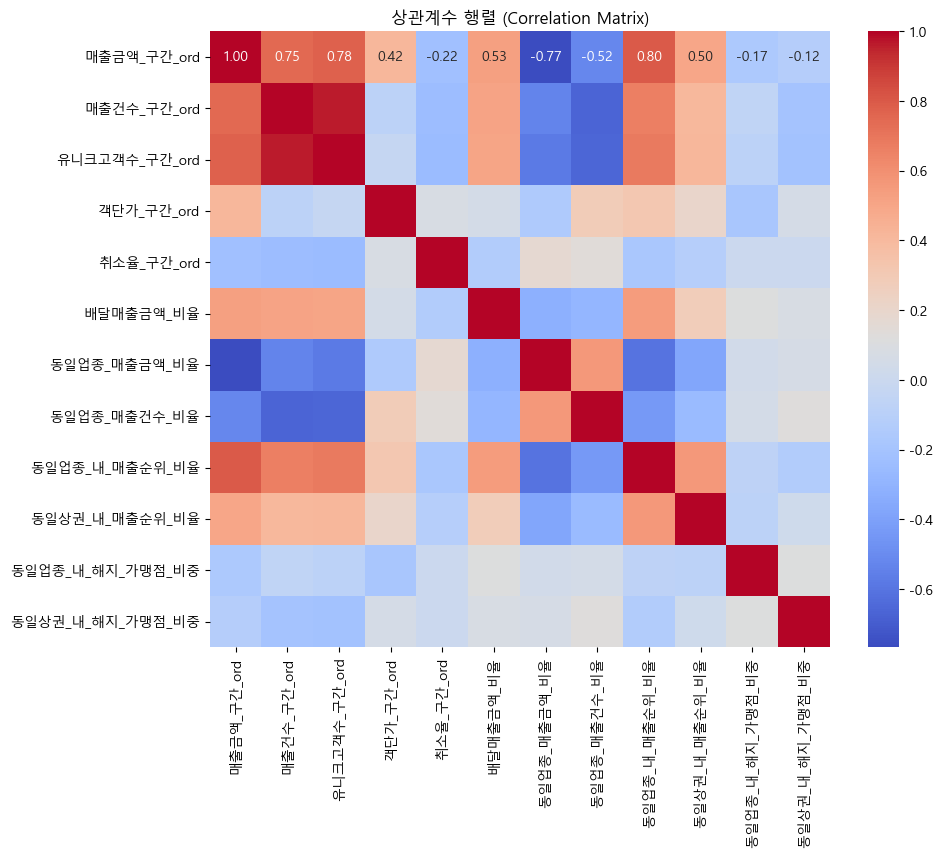

            Variable         VIF
0              const  227.124530
1        매출금액_구간_ord    7.899548
2        매출건수_구간_ord   13.319215
3      유니크고객수_구간_ord   13.205176
4         객단가_구간_ord    3.463068
5         취소율_구간_ord    1.062705
6          배달매출금액_비율    1.446635
7       동일업종_매출금액_비율    3.116780
8       동일업종_매출건수_비율    2.726965
9     동일업종_내_매출순위_비율    6.707629
10    동일상권_내_매출순위_비율    7.736723
11  동일업종_내_해지_가맹점_비중    1.149306
12  동일상권_내_해지_가맹점_비중    1.212808


In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False  # minus 기호 깨짐 방지


# 분석 대상 열 (수치형 또는 인코딩된 ordinal 변수만 포함)
cols_for_check = [
    "매출금액_구간_ord",
    "매출건수_구간_ord",
    "유니크고객수_구간_ord",
    "객단가_구간_ord",
    "취소율_구간_ord",
    "배달매출금액_비율",
    "동일업종_매출금액_비율",
    "동일업종_매출건수_비율",
    "동일업종_내_매출순위_비율",
    "동일상권_내_매출순위_비율",
    "동일업종_내_해지_가맹점_비중",
    "동일상권_내_해지_가맹점_비중"
]


# 1. 상관계수 행렬 시각화
corr = df[cols_for_check].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("상관계수 행렬 (Correlation Matrix)")
plt.show()

# 2. VIF 계산
X = add_constant(df[cols_for_check].dropna())  # 상수항 추가
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


# 6.군집분석

클러스터 개수: cluster
0    11837
2     9175
3       76
1        9
Name: count, dtype: int64


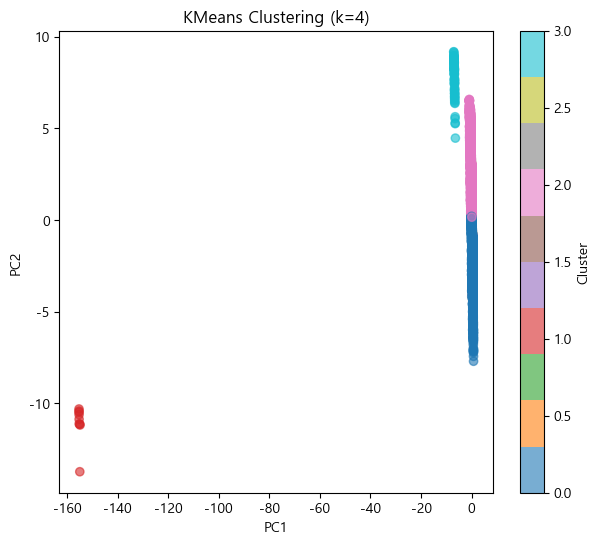

In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# === 1) 숫자형 변수만 선택 ===
num_cols = df.select_dtypes(include=[np.number]).columns
X = df[num_cols].dropna()   # 결측 있으면 제거 (간단히)

# === 2) 표준화 ===
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# === 3) k=3 으로 KMeans 학습 (원하면 바꾸기) ===
k = 4
model = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = model.fit_predict(X_std)

# === 4) 결과 저장 ===
df_clustered = df.loc[X.index].copy()
df_clustered["cluster"] = labels

print("클러스터 개수:", df_clustered["cluster"].value_counts())

# === 5) 2D 시각화 (PCA 차원축소) ===
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_std)

plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="tab10", alpha=0.6)
plt.title(f"KMeans Clustering (k={k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()
